In [1]:
%matplotlib inline
# Imports #
from fiber_properties import FiberImage
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Parameters to adjust #
# Note this code is best run if .get_fiber_center and .get_fiber_centroid have already been run
# and saved to .pkl files
number = 10  # Number of images to average and plot average with
case = 2
folder = '../data/modal_noise/rv_error/'
meth = 'full'  # method
cam = 'nf'  # camera

In [6]:
# Note can add more cases #
if case == 1:
    folder += 'coupled_agitation/'
    nf_diameter = 100
    angle_nf = np.deg2rad(90-59)
    angle_ff = np.deg2rad(90+59)
if case == 2:
    folder += 'LED/'
    nf_diameter = 100
    angle_nf = np.deg2rad(90-58.5)
    angle_ff = np.deg2rad(90+58.5)
if case == 3:
    folder += 'slow_agitation/'
    nf_diameter = 100
    angle_nf = np.deg2rad(90-58)
    angle_ff = np.deg2rad(90+58)
if case == 4:
    folder += 'coupled_ag_new/'
    nf_diameter = 100
    angle_nf = np.deg2rad(90-52.5)
    angle_ff = np.deg2rad(90+52.5)

In [7]:
center_x = []
center_y = []
for i in xrange(0, 300, 1):
    im_obj = FiberImage(folder + cam + '_' + str(i).zfill(3) + '_obj.pkl') # get .pkl file with data
    c = im_obj.get_fiber_center(method=meth, units='microns') - im_obj.get_fiber_centroid(method=meth, units='microns')
    center_x.append(c.x)
    center_y.append(c.y)
    print('Getting center for image set %s...' % i)
    print(c)

# Make into np arrays #
cen_x = np.array(center_x)
cen_y = np.array(center_y)

# Compute drift #
x_median = np.median(center_x)
y_median = np.median(center_y)
center_x = [x - x_median for x in cen_x]
center_y = [y - y_median for y in cen_y]

Getting center for image set 0...
(1.24412480029, 1.55179609635)
Getting center for image set 1...
(1.23297495692, 1.56645237159)
Getting center for image set 2...
(1.23719766906, 1.54180029188)
Getting center for image set 3...
(1.23682144882, 1.55196006671)
Getting center for image set 4...
(1.24437527023, 1.56344704738)
Getting center for image set 5...
(1.24370438638, 1.56071025303)
Getting center for image set 6...
(1.23725354197, 1.56270061652)
Getting center for image set 7...
(1.26091811581, 1.56963463289)
Getting center for image set 8...
(1.22536967571, 1.55595845495)
Getting center for image set 9...
(1.23153687206, 1.53835078524)
Getting center for image set 10...
(1.23936691706, 1.55316430834)
Getting center for image set 11...
(1.2523332502, 1.55908104375)
Getting center for image set 12...
(1.25258431571, 1.55107822965)
Getting center for image set 13...
(1.23813484227, 1.5577793763)
Getting center for image set 14...
(1.23812810851, 1.55804435044)
Getting center for ima

In [8]:
center = []  # create list for both x and y centers
for c_x, c_y in zip(center_x, center_y):
    if cam is 'nf':
        calc = np.sqrt(c_x**2 + c_y**2) * np.cos(np.arctan(c_y/c_x) + (angle_nf) + (np.pi/2)*(1 - np.sign(c_x)))
        center.append(calc)
    if cam is 'ff':
        calc = np.sqrt(c_x**2 + c_y**2) * np.cos(np.arctan(c_y/c_x) + (angle_ff) + (np.pi/2)*(1 - np.sign(c_x)))
        center.append(calc)
    
# Make average list #
center_avg = []
itr = range(number)
for i in xrange(0, 300, number):
    center_to_avg = []
    for num in itr:
        center_to_avg.append(center[num])
    center_avg.append(np.average(center_to_avg))
    itr = [x + number for x in itr]

In [9]:
# Compute std #
center_std = np.std(center)
center_avg_std = np.std(center_avg)

# Get diameter #
if cam is 'nf':
    diameter = nf_diameter
if cam is 'ff':
    print('Getting ff diameter')
    diameter = im_obj.get_fiber_diameter(method=meth, units='microns')
    print(diameter)

In [10]:
# Compute RV error #
rv_std_all = (3 * 10**8) * (center_std) / ((150000)*(diameter))
rv_std_avg = (3 * 10**8) * (center_avg_std) / ((150000)*(diameter))

# Convert to m/s #
center_ms = [(3 * 10**8) * (x) / ((150000)*(diameter)) for x in center]
center_avg_ms = [(3 * 10**8) * (x) / ((150000)*(diameter)) for x in center_avg]

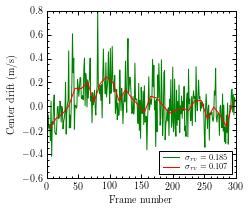

In [12]:
# Plot #
center_line = plt.plot(center_ms, color='g', label='$\sigma_{rv}=%.3f$' % (rv_std_all))
avg_line = plt.plot(xrange(number/2, 300, number), center_avg_ms, color='r', label='$\sigma_{rv}=%.3f$' % (rv_std_avg))

plt.ylabel('Center drift (m/s)')
plt.xlabel('Frame number')

plt.legend(loc='lower right')